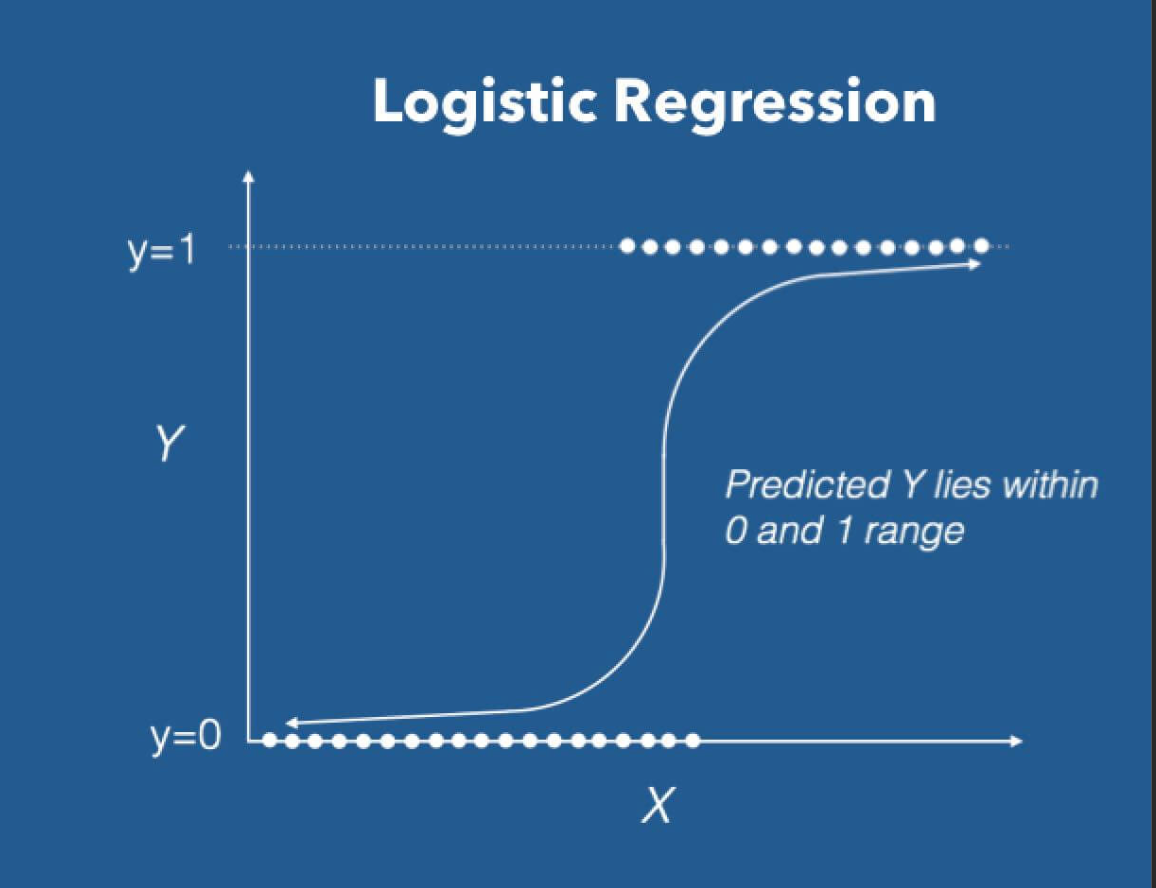

### **Logistic Regression in Data Analysis**

#### **What is Logistic Regression?**
Logistic regression is a **supervised machine learning algorithm** used for **classification problems**. It predicts the probability of a binary outcome (e.g., yes/no, true/false, spam/not spam) based on one or more independent variables. Unlike linear regression, which predicts continuous values, logistic regression outputs probabilities that are transformed using the **sigmoid function** to ensure values remain between 0 and 1.

The logistic regression model follows the equation:

\[
P(Y=1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n)}}
\]

Where:
- \( P(Y=1) \) is the probability of the event occurring
- \( \beta_0 \) is the intercept
- \( \beta_1, \beta_2, ... \beta_n \) are the coefficients of the independent variables \( X_1, X_2, ... X_n \)
- \( e \) is Euler’s number (≈2.718)

#### **Types of Logistic Regression**
1. **Binary Logistic Regression** – Classifies data into two categories (e.g., pass/fail, spam/not spam).
2. **Multinomial Logistic Regression** – Handles cases where there are more than two categorical outcomes (e.g., classifying animals as cat, dog, or bird).
3. **Ordinal Logistic Regression** – Used for ordinal response variables where categories have a meaningful order but not equal spacing (e.g., rating levels: poor, average, good).

#### **How is Logistic Regression Used in Data Analysis?**
1. **Predicting Binary Outcomes** – E.g., predicting if a customer will buy a product (yes/no).
2. **Medical Diagnosis** – E.g., determining the probability of a patient having a disease based on symptoms.
3. **Credit Scoring** – Assessing whether a borrower will default on a loan.
4. **Spam Detection** – Classifying emails as spam or not spam.
5. **Customer Churn Prediction** – Estimating the likelihood of a customer leaving a service.
6. **Fraud Detection** – Identifying fraudulent transactions in banking.

#### **Advantages of Logistic Regression**
✔ Simple and easy to implement  
✔ Interpretable coefficients  
✔ Works well for small datasets  
✔ Less prone to overfitting compared to more complex models  

#### **Limitations of Logistic Regression**
❌ Assumes linear relationship between independent variables and log-odds  
❌ Struggles with highly correlated independent variables (multicollinearity)  
❌ Not suitable for complex, non-linear relationships  



# A simple Logistic Regression implementation in Python using scikit-learn.

#Dataset Description
This example predicts whether a person has diabetes based on features like blood pressure and glucose levels.

We use the Pima Indians Diabetes dataset, which contains health indicators and whether a patient has diabetes (1) or not (0).

#Objects in the dataset

- Pregnancies → Number of times pregnant

- Glucose → Blood sugar level

- BloodPressure → Blood pressure

- SkinThickness → Skin fold thickness

- Insulin → Insulin level

- BMI → Body mass index

- DiabetesPedigreeFunction → Family diabetes history

- Age → Age in years

- Outcome → Target variable (1 = Diabetes, 0 = No Diabetes)

#Step 1:  Install Dependencies

If you haven't installed scikit-learn, install it using:

pip install scikit-learn pandas matplotlib seaborn

#Step 2: Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Step 3: Load the Dataset

We'll use the Pima Indians Diabetes Dataset (a common dataset for classification problems).

In [2]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
           "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

df = pd.read_csv(url, names=columns)

# Display first 5 rows
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Check for null values
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


#Step 4: Data Preprocessing

Before training, we split the data into features (X) and target (y) and standardize the features to improve performance.

In [5]:
# Split data into features (X) and target (y)
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Standardize features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


✔ Why scale the data?
Logistic regression is sensitive to feature magnitudes, so we standardize using StandardScaler().

# Step 5: Train the Logistic Regression Model




In [8]:
# Create and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

#Step 6: Make Predictions and Evaluate the Model

We predict on the test set.

In [10]:
# Make predictions
y_pred = model.predict(X_test)
y_pred




array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

**Interpreting the Results**

After making predictions, we evaluate the model.

✅ Accuracy Score

Measures overall correct predictions.

In [ ]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)



In [ ]:
# Print results
print(f"Accuracy: {accuracy:.2f}")

#A high accuracy means the model is predicting correctly most of the time.




Accuracy: 0.75


**Confusion Matrix**

Shows true positives, false positives, true negatives, and false negatives.

Classification Report

Shows Precision, Recall, and F1-score.

In [ ]:
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Confusion Matrix:
 [[79 20]
 [18 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



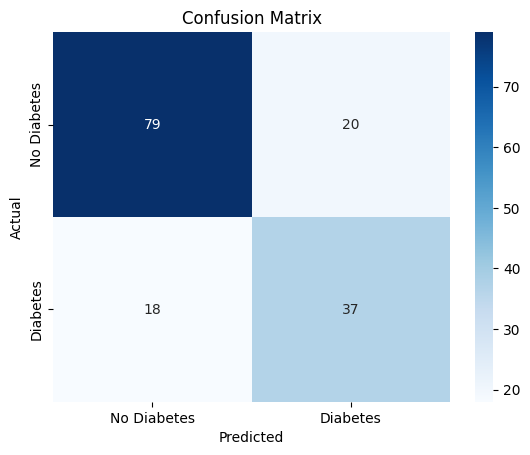

In [ ]:
# Visualize confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

🔹 How to read it?

                               Predicted: No	      Predicted: Yes

Actual: No (True Negatives)	     ✅ Correct	           ❌ False Positive


---



Actual: Yes (False Negatives)	 ❌ False Negative	   ✅ Correct

---



**More True Positives & True Negatives = Better model performance.**

#Step 7: Interpret the Results

* Accuracy: Measures overall correctness of predictions.

* Confusion Matrix: Shows true positives, false positives, etc.

* Classification Report: Includes precision, recall, and F1-score for better insight.

#Step 1: Feature Importance Analysis

Since logistic regression uses coefficients to determine feature importance, we can extract and visualize them.

In [12]:
# Extract feature importance (absolute values of coefficients)
feature_importance = abs(model.coef_[0])
feature_importance



array([0.21624195, 1.06932996, 0.25867641, 0.04720329, 0.19899822,
       0.79237086, 0.22709403, 0.43036184])

In [13]:
# Create a DataFrame for visualization
feature_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importance})
feature_df = feature_df.sort_values(by="Importance", ascending=False)




In [ ]:
# Print feature importance
print(feature_df)



                    Feature  Importance
1                   Glucose    1.069330
5                       BMI    0.792371
7                       Age    0.430362
2             BloodPressure    0.258676
6  DiabetesPedigreeFunction    0.227094
0               Pregnancies    0.216242
4                   Insulin    0.198998
3             SkinThickness    0.047203


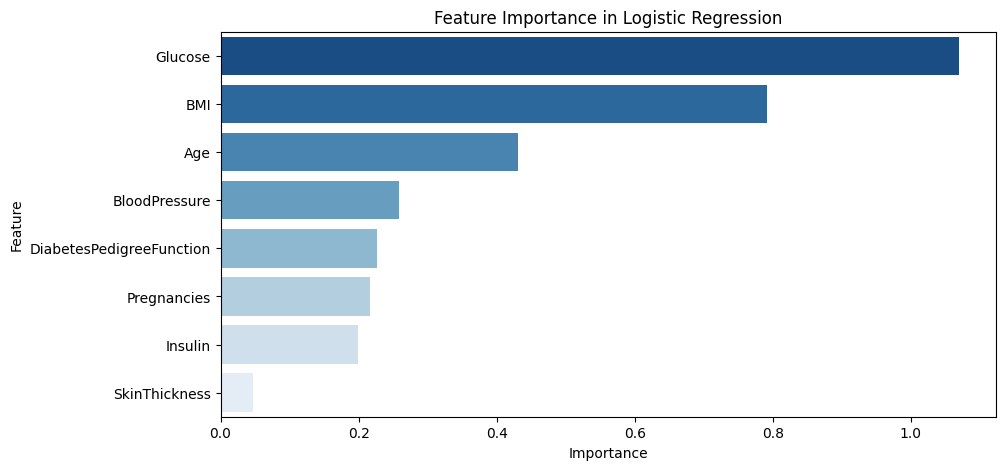

In [14]:
# Plot feature importance
plt.figure(figsize=(10,5))
sns.barplot(x=feature_df["Importance"], y=feature_df["Feature"], hue=feature_df["Feature"], palette="Blues_r", legend=False)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Logistic Regression")
plt.show()

# Interpreting Results

- Higher importance → More influence on diabetes prediction.

- Lower importance → Less impact on prediction.

# Step 2: Hyperparameter Tuning (Grid Search)

We’ll use GridSearchCV to optimize C (regularization strength).

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100]}


In [ ]:

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [ ]:

# Best hyperparameter
print(f"Best C value: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_:.2f}")

Best C value: {'C': 10}
Best Accuracy: 0.77


 - What’s happening here?

- C controls regularization (prevents overfitting).

- Grid Search finds the best C value using cross-validation.

#Step 3: Compare Logistic Regression with Random Forest & SVM

We’ll now train Random Forest and Support Vector Machine (SVM) and compare results.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)


In [ ]:

# Train SVM
svm_model = SVC(kernel="linear", C=1)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)


In [ ]:

# Print Accuracy Comparison
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_acc:.2f}")
print(f"SVM Accuracy: {svm_acc:.2f}")


Logistic Regression Accuracy: 0.75
Random Forest Accuracy: 0.73
SVM Accuracy: 0.76


**Which model is best?**

- Random Forest performs well with large, complex datasets.

- SVM works well if data is not too large and has clear separation.

- Logistic Regression is simple and interpretable.

 📌 **Model Comparison & Best Choice**

Our results:

Logistic Regression Accuracy: 75%

Random Forest Accuracy: 73%

SVM Accuracy: 76%

📌 Which Model is Best?

✔ SVM (76%) performed slightly better than Logistic Regression (75%) and Random Forest (73%).

✔ Logistic Regression is a close second and easier to interpret.

✔ Random Forest is slightly lower but could improve with hyperparameter tuning.





## **🎯 Summary**
✅ **Feature Importance** → Found key factors affecting diabetes prediction.  
✅ **Hyperparameter Tuning** → Found optimal `C` value for better accuracy.  
✅ **Model Comparison** → Compared Logistic Regression with Random Forest & SVM.  
